In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('horseRacing.csv')
df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0


In [3]:
df.shape

(98390, 64)

**Dropping missing values**

In [4]:
# Calculate the number of missing values in each row
num_missing = df.isna().sum(axis=1)

# Get the indices of rows with more than half missing values
half_cols = df.shape[1] // 2
indices_to_drop = num_missing[num_missing >= half_cols].index

# Drop the rows with 50% missing values and their matching IDs
df = df.drop(indices_to_drop)

# Output the result
df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0


In [5]:
df.shape

(77083, 64)

**Converting labels into 0 and 1**

In [6]:
for i in range(len(df)):
  if df["calc_position"].iloc[i] !=1 :
    df["calc_position"].iloc[i] = 0
  else:
    df["calc_position"].iloc[i] = 1

df["calc_position"]

C:\Users\Irfan Ahmad\AppData\Local\Temp\ipykernel_656\1837209220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["calc_position"].iloc[i] = 0
C:\Users\Irfan Ahmad\AppData\Local\Temp\ipykernel_656\1837209220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["calc_position"].iloc[i] = 1


0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
98351    0.0
98352    1.0
98353    0.0
98354    0.0
98355    0.0
Name: calc_position, Length: 77083, dtype: float64

**Visualizing the data**

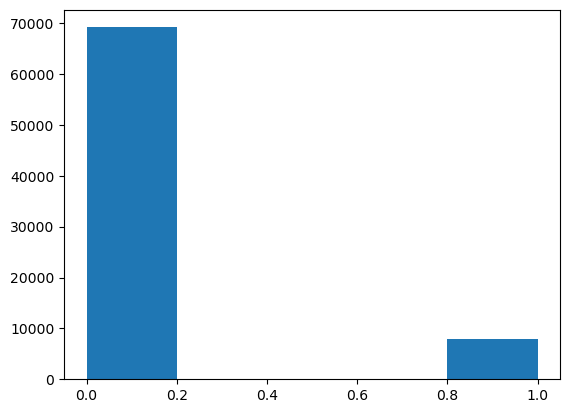

In [7]:
# Plot the histogram
plt.hist(df['calc_position'], bins=5)
plt.show()

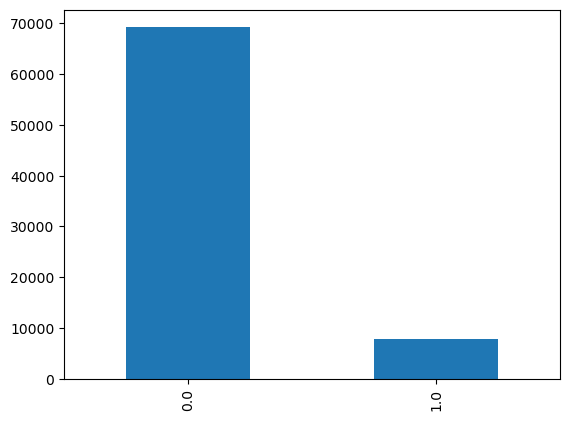

In [8]:
df['calc_position'].value_counts().plot(kind='bar')
plt.show()

**ONE_HOT_ENCODING**

In [9]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['race_id','horse_id'])
one_hot_encoded_data

,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,1-109,1-110,...,horse_id_1757340,horse_id_1757342,horse_id_1757343,horse_id_1757346,horse_id_1758858,horse_id_1758859,horse_id_1760069,horse_id_1765127,horse_id_1765129,horse_id_2248560
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,0.78,0.59,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.78,0.59,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,1.60,1.37,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,-0.88,-0.98,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,-0.05,0.59,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,-0.58,0.58,...,0,0,0,0,0,0,0,0,0,0
98352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,-0.58,0.58,...,0,0,0,0,0,0,0,0,0,0
98353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,-0.58,0.58,...,0,0,0,0,0,0,0,0,0,0
98354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,-0.58,0.58,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# What is wrong with dataset, how to solve it?
# The dataset is not balanced, we need to balance it. It is very skewed to the left. 1 class is in minority and 0 class is majority of the data. We need to balance it by undersampling the majority class or oversampling the minority class. We will use undersampling in this case.

**Multi-Layer Perceptron**

In [11]:
class MLP:
    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.01, epochs=1000):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.weights_input_hidden = np.random.normal(0, scale=0.1, size=(self.n_inputs, self.n_hidden))
        self.bias_input_hidden = np.zeros(self.n_hidden)
        self.weights_hidden_output = np.random.normal(0, scale=0.1, size=(self.n_hidden, self.n_outputs))
        self.bias_hidden_output = np.zeros(self.n_outputs)
        
        self.loss_list = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, X, y):
        for e in range(self.epochs):
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
            output = self.sigmoid(output_layer_input)

            loss = np.mean((y - output) ** 2)
            self.loss_list.append(loss)

            error = y - output
            output_error_term = error * self.sigmoid_derivative(output)
            hidden_error = np.dot(output_error_term, self.weights_hidden_output.T)
            hidden_error_term = hidden_error * self.sigmoid_derivative(hidden_layer_output)

            self.weights_hidden_output += self.learning_rate * np.dot(hidden_layer_output.T, output_error_term)
            self.bias_hidden_output += self.learning_rate * np.sum(output_error_term, axis=0)
            self.weights_input_hidden += self.learning_rate * np.dot(X.T, hidden_error_term)
            self.bias_input_hidden += self.learning_rate * np.sum(hidden_error_term, axis=0)
    
    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
        output = self.sigmoid(output_layer_input)
        return output
    
def driver_function():
    # load the data and perform one-hot encoding if necessary
    df = pd.read_csv('horseRacing.csv')
    num_missing = df.isna().sum(axis=1)

    # Get the indices of rows with more than half missing values
    half_cols = df.shape[1] // 2
    indices_to_drop = num_missing[num_missing >= half_cols].index

    # Drop the rows with 50% missing values and their matching IDs
    df = df.drop(indices_to_drop)

    X = df.drop('calc_position', axis=1).values
    y = df['calc_position'].values
    
    # create an instance of the MLP class
    mlp = MLP(n_inputs=X.shape[1], n_hidden=4, n_outputs=1, learning_rate=0.01, epochs=1000)
    
    # train the MLP
    mlp.train(X, y)
    
    # plot the loss over epochs
    plt.plot(mlp.loss_list)
    plt.show()
    
    # make predictions
    predictions = mlp.predict(X)
    
    # print the actual output and the predicted output
    print('Actual output:', y)
    print('Predicted output:', predictions)
    
    # print the predicted output rounded to 0 or 1
    print('Rounded predicted output:', np.round(predictions))

driver_function()


C:\Users\Irfan Ahmad\AppData\Local\Temp\ipykernel_656\2500563088.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MemoryError: Unable to allocate 44.3 GiB for an array with shape (77083, 77083) and data type float64